**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("coin")))
suppressMessages(suppressWarnings(library("pheatmap")))
suppressMessages(suppressWarnings(library("corrplot")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "region.prepare.group.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 18341     5


Chrom,ChromStart,ChromEnd,Region,Group
chr1,100036895,100039189,chr1:100036895-100039189,Cluster00
chr1,100132375,100133491,chr1:100132375-100133491,Cluster00
chr1,100265562,100266994,chr1:100265562-100266994,Cluster00
chr1,10032429,10033763,chr1:10032429-10033763,Cluster13
chr1,100362769,100363401,chr1:100362769-100363401,Cluster00
chr1,100400445,100400762,chr1:100400445-100400762,Cluster01


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "results.enrich.fcc_cluster_vs_others.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary_cluster_vs_others = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 7815    6


Group,Feature,Stat,Pval,Score,Padj
Cluster00,H2AFZ,33.107126,0,1.6340344,0
Cluster00,H3K27ac,28.396013,0,1.3259570,0
Cluster00,H3K27me3,-10.903121,0,-1.2439611,0
Cluster00,H3K36me3,7.978978,0,-0.0091896,0
Cluster00,H3K4me1,-32.965805,0,-2.6867228,0
Cluster00,H3K4me2,48.054838,0,2.6115214,0


In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "results.enrich.fcc_cluster_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary_cluster_vs_inactive = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 7815    6


Group,Feature,Stat,Pval,Score,Padj
Cluster00,H2AFZ,31.892005,0,1.9227697,0
Cluster00,H3K27ac,35.280852,0,2.1939354,0
Cluster00,H3K27me3,-8.894941,0,-1.3408835,0
Cluster00,H3K36me3,5.036023,0,-0.2261681,0
Cluster00,H3K4me1,-26.686471,0,-2.7645101,0
Cluster00,H3K4me2,43.042401,0,2.8149920,0


In [6]:
dat = dat_fit_summary_cluster_vs_inactive
dat = dat %>% dplyr::mutate(nLog10Padj = -log10(Padj))

### summary
idx = is.infinite(dat$nLog10Padj)
vec = dat$nLog10Padj[!idx]
print(summary(vec))

### capped
idx = is.infinite(dat$nLog10Padj)
dat$nLog10Padj[idx] = 5

dat_fit_summary = dat

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000304 0.347642 0.979435 1.278515 2.050709 3.918646 


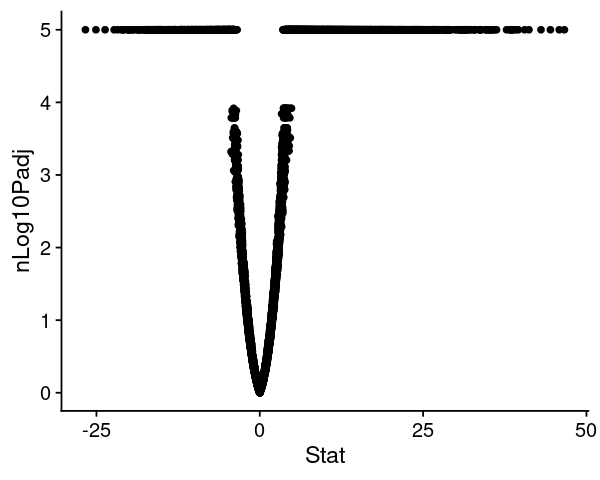

In [7]:
options(repr.plot.height = 4, repr.plot.width=5)
dat = dat_fit_summary
gpt = ggplot(dat, aes(x=Stat, y=nLog10Padj)) + geom_point() + theme_cowplot()

print(gpt)

In [8]:
dat = dat_fit_summary
print(dim(dat))
vec = unique(dat$Feature)
length(vec)

[1] 7815    7


[1] 521

In [9]:
dat = dat_fit_summary
dat = dat %>% dplyr::filter(Padj == 0)
print(dim(dat))
vec = unique(dat$Feature)
length(vec)

[1] 3969    7


[1] 521

In [10]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::group_by(Group) %>%
    dplyr::slice_max(Stat, n = 10)

dat_fit_summary_upper = dat
print(dim(dat))
head(dat)

[1] 150   7


Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,H3K9ac,46.62849,0,3.101941,0,5
Cluster00,H3K4me3,45.83482,0,3.038433,0,5
Cluster00,PHF8,44.48134,0,2.930131,0,5
Cluster00,H3K4me2,43.04240,0,2.814992,0,5
Cluster00,GABPB1,40.54064,0,2.614808,0,5
Cluster00,HCFC1,39.57734,0,2.537728,0,5


In [11]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::group_by(Group) %>%
    dplyr::slice_min(Stat, n = 10)

dat_fit_summary_lower = dat
print(dim(dat))
head(dat)

[1] 150   7


Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,H3K4me1,-26.68647,0,-2.764510,0,5
Cluster00,CBFA2T3,-25.08085,0,-2.636033,0,5
Cluster00,CBFA2T2,-23.68155,0,-2.524065,0,5
Cluster00,TAL1,-21.23304,0,-2.328143,0,5
Cluster00,ARID1B,-20.99379,0,-2.308999,0,5
Cluster00,TCF12,-20.81448,0,-2.294650,0,5


In [12]:
dat = dat_fit_summary_upper
vec = dat$Feature
vec = unique(vec)
print(length(vec))

dat = dat_fit_summary_lower
vec = dat$Feature
vec = unique(vec)
print(length(vec))

[1] 119
[1] 88


In [13]:
dat = bind_rows(dat_fit_summary_upper, dat_fit_summary_lower)
vec = dat$Feature
vec = unique(vec)

vec_txt_feature_subset = vec
print(length(vec))

[1] 176


In [14]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")

vec = vec_txt_feature_subset
dat = dat[,vec]
head(dat)

,H3K9ac,H3K4me3,PHF8,H3K4me2,GABPB1,HCFC1,RBFOX2,SUPT5H,EP400,PHF20,⋯,GATAD2B,CTBP1,STAT5A,ZKSCAN8,TEAD4,ARID3A,RBM17,RBM34,RCOR1,MTA2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,3.10194075,3.03843322,2.9301314,2.8149920,2.6148083,2.53772808,2.48225862,2.4509098,2.4507966,2.4247403,⋯,-1.6039168,-2.0432261,-1.9089302,-1.0836009,-2.037245195,-1.4058742,-1.4480360,-1.06427747,-1.7029673,-2.01600385
Cluster01,0.91969251,-0.72498949,-0.1656259,1.1430475,0.3548076,-0.01423067,0.09204257,-0.2405188,0.9025766,-0.4199087,⋯,-1.1015528,-0.1099929,-0.9573560,0.6184128,-1.325719585,0.1036135,-2.1372128,-1.96863759,0.4693873,0.03125309
Cluster02,-0.79245083,-1.66501025,-1.6827581,-0.2459801,-0.5970193,-1.05572280,-0.99105407,-1.7776983,0.2220944,-0.8367292,⋯,0.6123228,1.3794289,2.3242109,1.0272953,2.470003467,0.9726247,-0.8669863,-0.76119975,1.6551671,2.33221598
Cluster03,0.04858881,0.05361843,-0.2109226,2.2239386,1.1623888,0.77318465,0.42782792,-1.9051380,1.7111153,0.7169428,⋯,0.1290939,1.5971449,0.4917659,0.6222959,0.218733592,0.7137860,-0.9849663,-0.16365060,1.0075564,0.24149060
Cluster04,-1.87711965,0.82094708,0.6665513,3.0453677,1.2272337,0.35333289,0.65044780,-3.0866936,0.7812326,1.1328007,⋯,-0.4158782,0.7939504,0.5002992,-0.5289251,-0.001805761,-1.2267770,-0.3909597,-0.07685261,-0.2494738,-1.15127041
Cluster05,0.63643986,3.20132603,1.8648062,4.1415923,1.6842940,0.29750749,1.68695790,-1.2576472,0.4738191,2.2406887,⋯,0.1109172,0.6824822,-0.9918031,-0.1046426,-1.162168804,-0.2903171,0.1634892,1.20268191,0.4051532,0.38195835


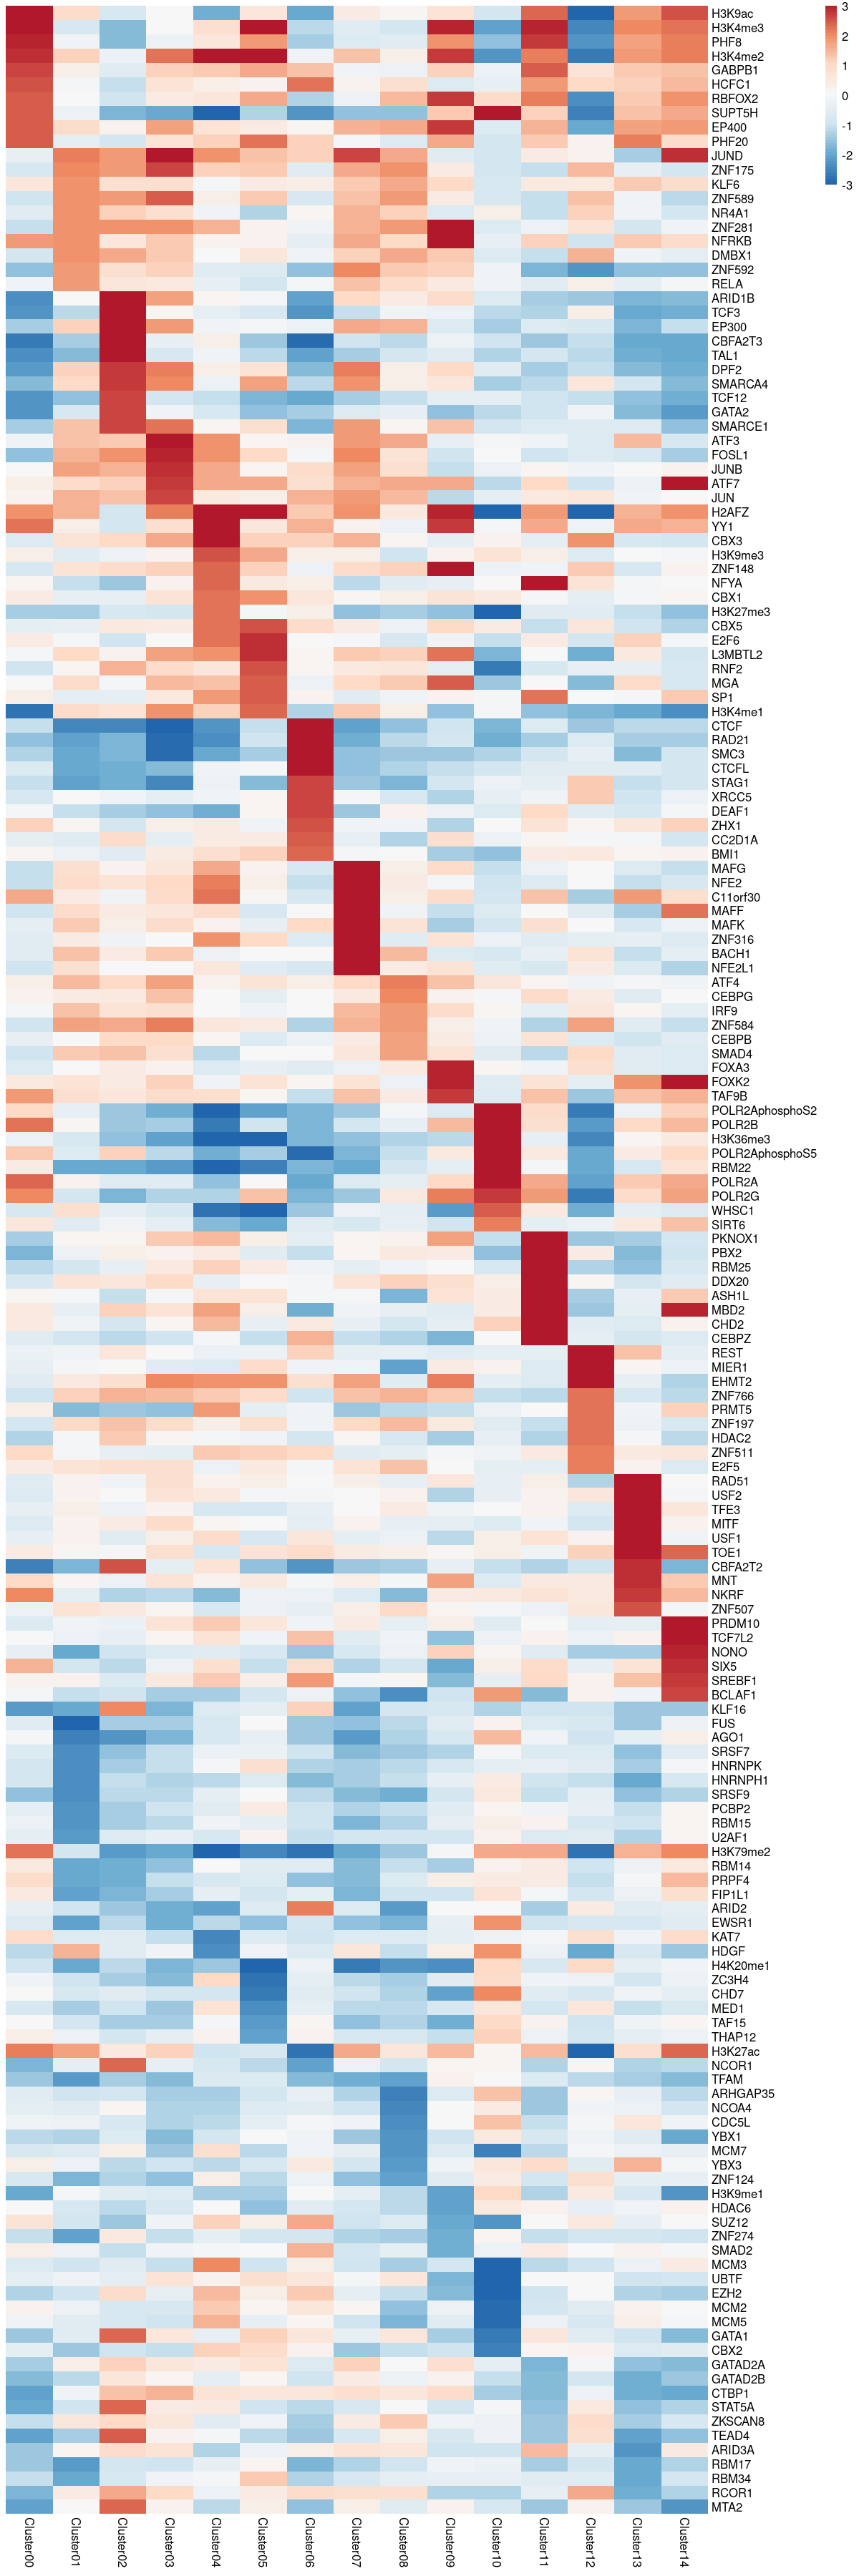

In [15]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

options(repr.plot.height = 30, repr.plot.width=10)
pheatmap(
    t(dat),
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = FALSE
)

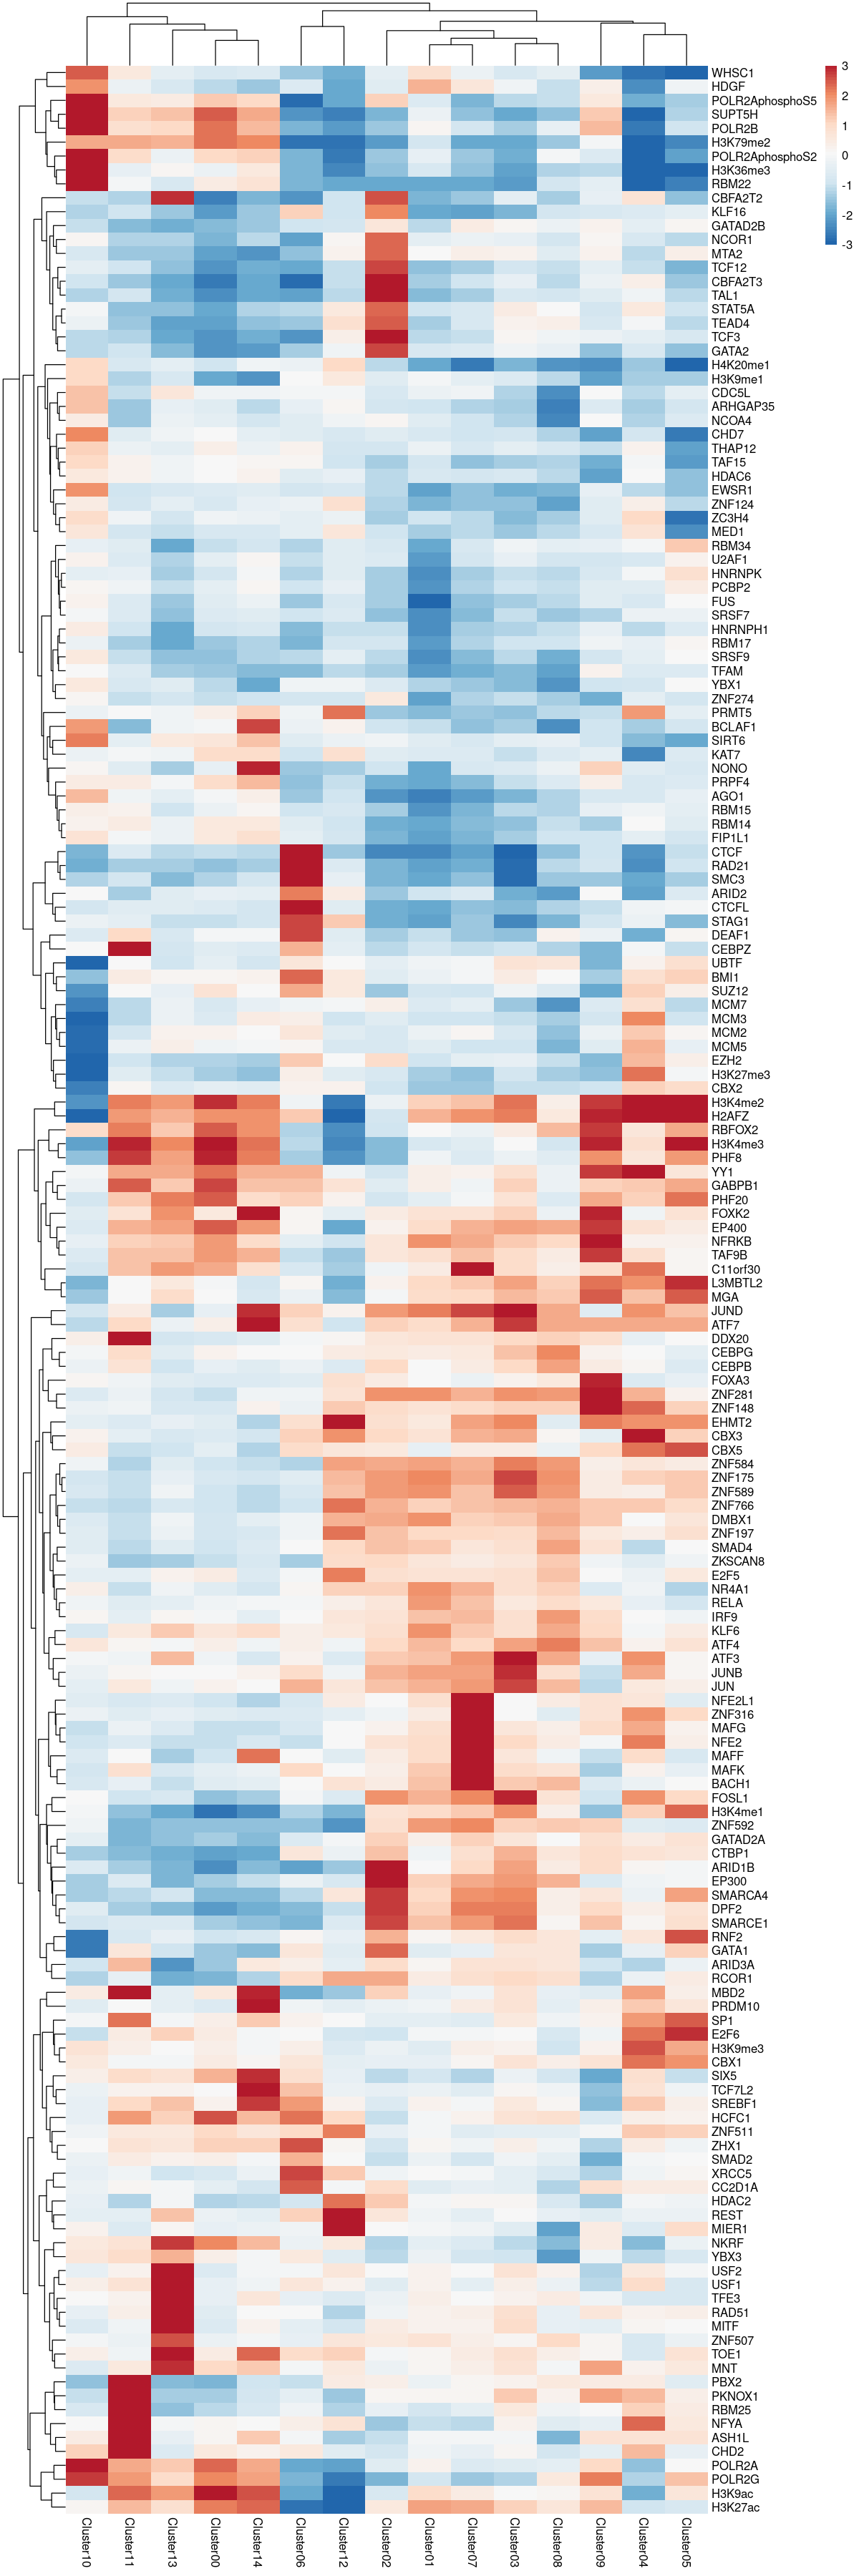

In [16]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

options(repr.plot.height = 30, repr.plot.width=10)
pheatmap(
    t(dat),
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    #cluster_rows = FALSE,
    #cluster_cols = FALSE
)

In [17]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")
dat = dat[,c("CTCF", "REST")]
dat

,CTCF,REST
,<dbl>,<dbl>
Cluster00,-1.0731417,-0.24150232
Cluster01,-2.4061518,-0.18515033
Cluster02,-2.4211701,0.62364711
Cluster03,-3.2301277,0.05802901
Cluster04,-2.2153281,-0.23540337
Cluster05,-1.0617343,-0.20531551
Cluster06,5.5986858,1.11368680
Cluster07,-2.0501394,-0.47633210
Cluster08,-1.5539802,-0.32300977


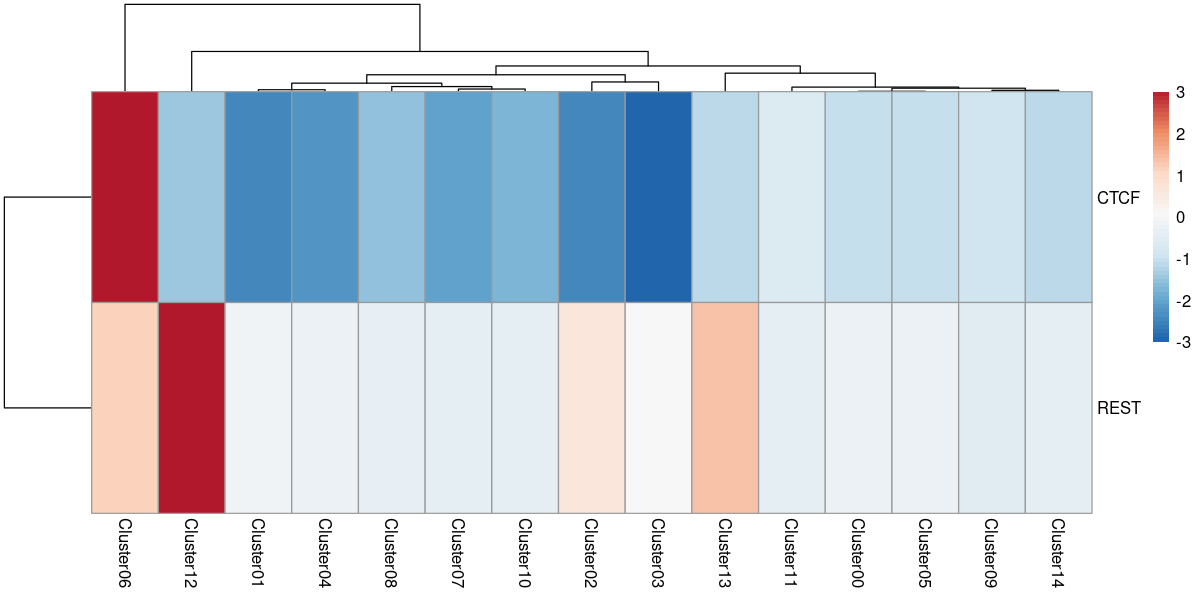

In [18]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

options(repr.plot.height = 5, repr.plot.width=10)
pheatmap(
    t(dat),
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    #cluster_rows = FALSE,
    #cluster_cols = FALSE
)

In [71]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")

head(dat)

,ADNP,AFF1,AFF4,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,-0.9768015,0.4857055,1.2770996,0.5531235,0.05695945,-2.3563861,0.49334316,-1.47081009,-0.13946761,1.7641394,⋯,-0.2179722,0.1080013,-0.48519072,-0.4039663,-0.7803523,0.4719939,0.8465770,0.4083387,0.3688826,0.98703604
Cluster01,0.4968631,-0.1582823,-1.0818699,-2.3311818,0.18398912,0.2350918,0.48471579,0.52838299,1.18993092,-1.1205029,⋯,0.5284207,0.3254563,1.03787070,1.3089110,0.5894340,0.2664243,0.4109430,-0.4420691,0.5313591,-0.76637091
Cluster02,0.7382069,-0.3460658,-0.4576709,-1.3290437,0.50889480,3.6470484,-0.43671634,0.90327301,-0.21785464,-0.7574828,⋯,-0.4786070,-0.7663914,-0.05443931,-0.4276203,0.5017584,-1.1543758,-0.8633672,0.1270029,-0.8408490,-0.82696927
Cluster03,-0.2301033,-0.1087180,-1.4262521,-0.8727772,1.34575365,-0.7215074,0.45505620,-0.45078138,-0.31057040,-1.7823026,⋯,-0.6341046,0.6052590,-0.30971980,-1.6491578,-1.3770186,0.6884237,-1.0492935,-0.1764221,-1.2769295,0.03407042
Cluster04,-0.4162951,-1.0407797,-0.5170661,0.7368797,0.89714887,-1.3712135,-0.02060912,-0.81507224,0.08394511,-0.7336812,⋯,0.8137411,0.4779022,0.69484450,-0.6887507,-1.1024028,-0.3301091,-0.1165248,-0.2473920,-0.8021788,-0.67012020
Cluster05,0.8836253,-0.9663621,-1.1366185,0.3994229,1.39516632,-0.1519454,1.07373833,0.04977018,-0.24357322,-1.8314698,⋯,0.4913081,0.7302305,-0.17971551,-0.4812609,-0.4066400,1.1702664,-0.8588779,1.0559626,-0.4306332,0.03722840


In [73]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")
dat = t(dat)
cor(dat, method = "spearman")

,Cluster00,Cluster01,Cluster02,Cluster03,Cluster04,Cluster05,Cluster06,Cluster07,Cluster08,Cluster09,Cluster10,Cluster11,Cluster12,Cluster13,Cluster14
Cluster00,1.00000000,-0.54611829,-0.63429065,0.075991725,0.115359838,-0.22231740,0.22561701,-0.22300692,-0.123650363,0.06928261,0.26351173,0.36806565,0.04775783,0.439125687,0.574761010
Cluster01,-0.54611829,1.00000000,0.27946520,-0.175446541,-0.416780964,0.07640131,-0.21945512,0.51135034,0.541010707,0.12811366,-0.20283529,-0.46197121,-0.01451758,-0.057578010,-0.348211204
Cluster02,-0.63429065,0.27946520,1.00000000,-0.071054610,-0.170088214,0.19256106,-0.13684389,0.11033091,-0.105858878,-0.09733976,-0.20792803,-0.44060366,0.11103036,-0.435283691,-0.454740000
Cluster03,0.07599173,-0.17544654,-0.07105461,1.000000000,0.428689387,0.31773251,0.39869037,0.13513630,-0.406387261,-0.11427592,0.09662419,0.29519551,-0.02901107,-0.043627673,-0.006900031
Cluster04,0.11535984,-0.41678096,-0.17008821,0.428689387,1.000000000,0.13721088,0.60236003,-0.33931678,-0.626048153,-0.28456812,0.54696861,0.20946405,-0.00944572,-0.006998715,0.074742088
Cluster05,-0.22231740,0.07640131,0.19256106,0.317732511,0.137210883,1.00000000,0.28613545,0.24493433,-0.264265483,0.05521722,-0.04652279,-0.04926203,-0.11148899,-0.214622292,-0.300828509
Cluster06,0.22561701,-0.21945512,-0.13684389,0.398690371,0.602360030,0.28613545,1.00000000,-0.15715357,-0.376847218,-0.30154501,0.43788386,0.12030739,0.23120750,0.051819768,0.176586378
Cluster07,-0.22300692,0.51135034,0.11033091,0.135136300,-0.339316777,0.24493433,-0.15715357,1.00000000,0.252970466,0.23706400,-0.40364853,-0.18698611,-0.05547229,-0.084301681,-0.190453304
Cluster08,-0.12365036,0.54101071,-0.10585888,-0.406387261,-0.626048153,-0.26426548,-0.37684722,0.25297047,1.000000000,0.10780644,-0.38405170,-0.15944402,0.04373858,0.144736454,-0.003114038
Cluster09,0.06928261,0.12811366,-0.09733976,-0.114275920,-0.284568121,0.05521722,-0.30154501,0.23706400,0.107806436,1.00000000,-0.12677620,-0.02468982,-0.18265145,0.171821092,-0.071498818


In [82]:
vec = brewer.pal(n=8, name="Reds")
vec

[1] "#FFF5F0" "#FEE0D2" "#FCBBA1" "#FC9272" "#FB6A4A" "#EF3B2C" "#CB181D"
[8] "#99000D"

In [83]:
vec = brewer.pal(n=8, name="Blues")
vec

[1] "#F7FBFF" "#DEEBF7" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5"
[8] "#084594"

In [88]:
vec1 = brewer.pal(n=6, name="Reds")
vec2 = brewer.pal(n=6, name="Blues")
vec  = c(rev(vec1), "#FFFFFF", vec2)
vec  = colorRampPalette(vec)(20)
vec  = rev(vec)
vec_txt_color = vec

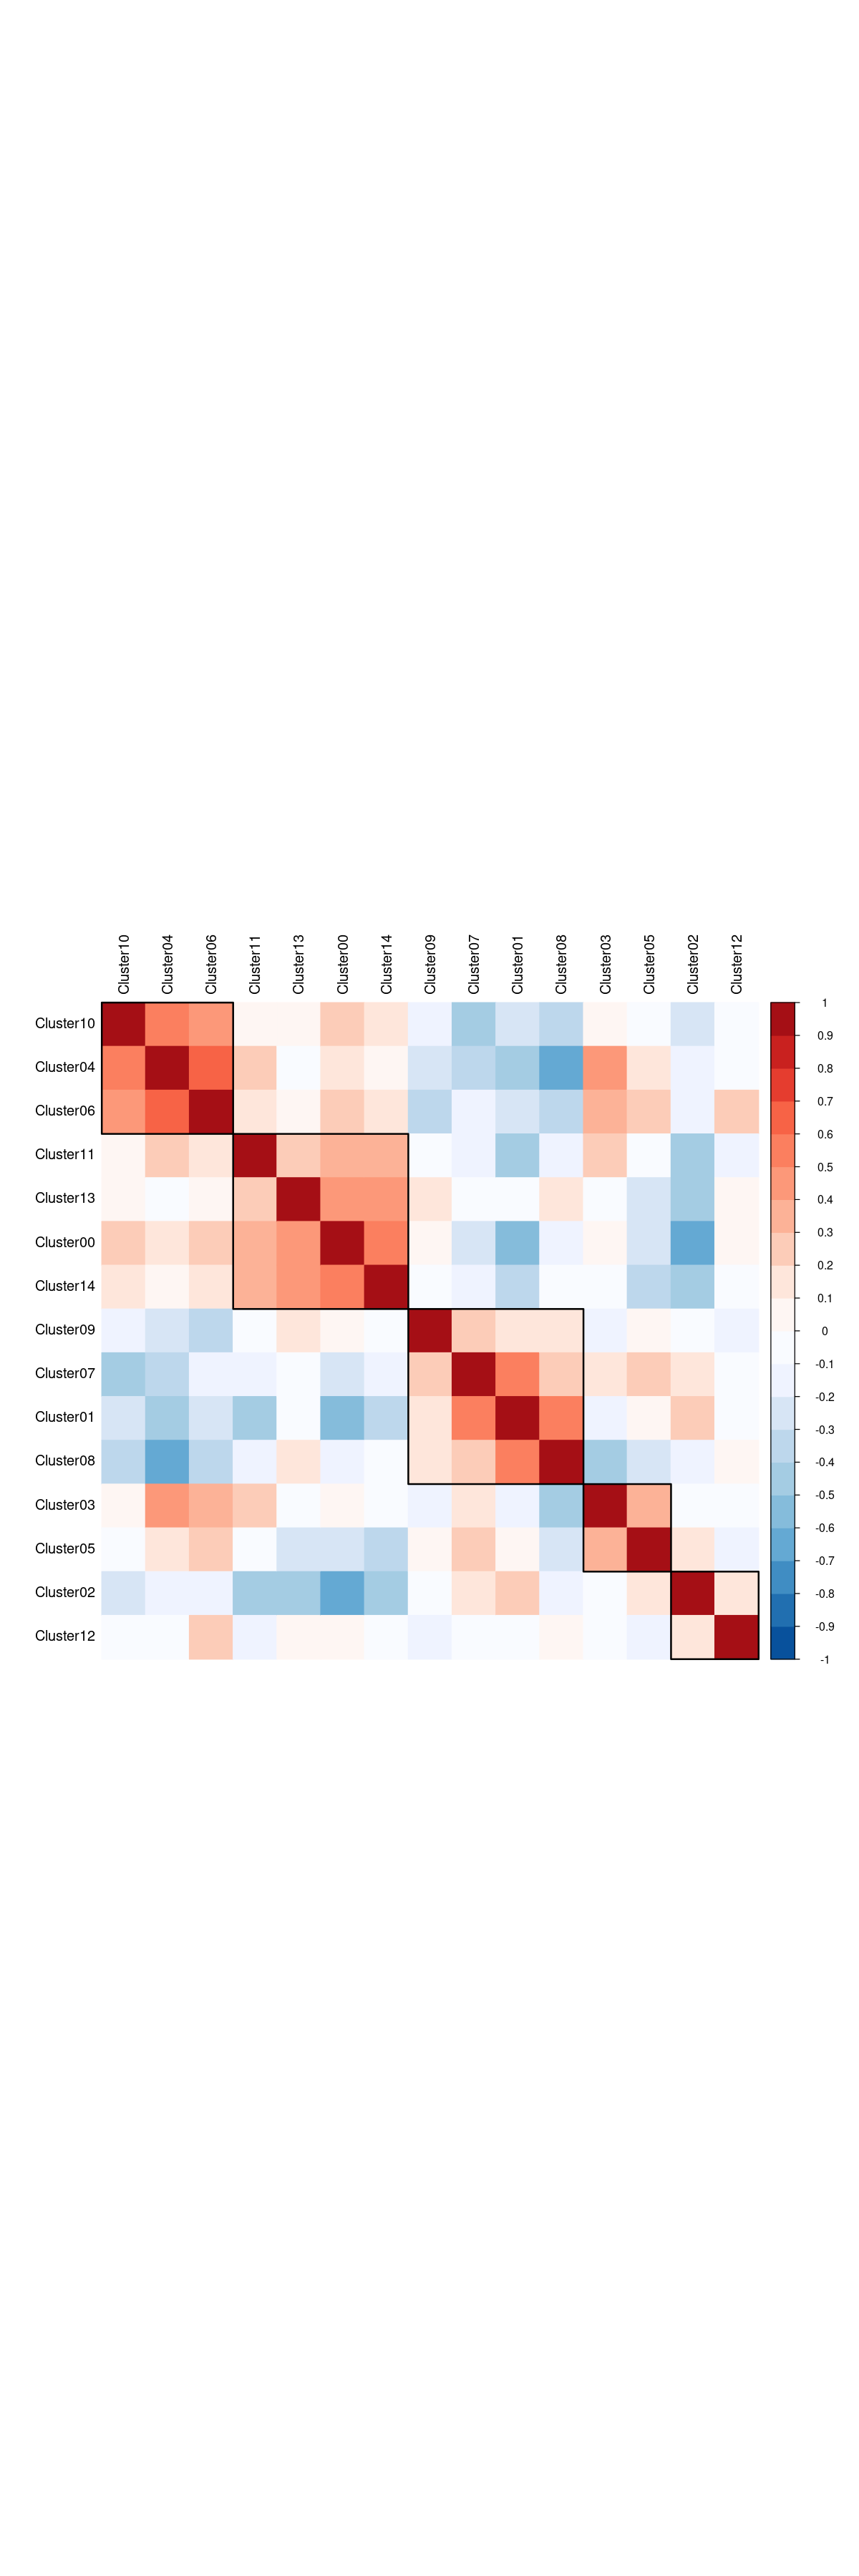

In [97]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")
dat = t(dat)
dat = cor(dat, method = "spearman")

# correlogram with hclust reordering
corrplot(
    dat, 
    method="color", 
    col=vec_txt_color, 
    tl.col="black",
    order="hclust", 
    addrect = 5,
)